In [ ]:
#Download dataset
!wget -O '../data/HR-Employee-Attrition.csv' 'https://docs.google.com/uc?export=download&id=1KuesGYYqJ3DdPq1gvMc5Sbs2KcvYXYeE'

In [ ]:
#!pip install -r requirements.txt
#!pip install pandas==1.2.5
#!pip install pandas_profiling==2.11.0
#!pip install matplotlib==3.3.4
#!pip install pycaret==2.3.1
#!pip install numpy==1.19.5
#!pip install seaborn==0.11.1
#!pip install scikit_learn==0.23.2

#depois de instalar esses pacotes, reinicie o kernel.
    #no jupyer notebook -> Kernel > Restart
    #no colab -> Runtime > Runtime Restart

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.decomposition import PCA
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
%matplotlib inline

# Leitura dos Dados

In [2]:
df = pd.read_csv("../data/HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

# Conhecendo os dados

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#Check valores faltamte
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#Check tipo das colunas
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
#Check colunas com apenas 1 valor
## colunas que nao ajudam discriminar o dado, elas não agregam
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [9]:
#drop colunas com apenas 1 tipo de valor
columns_unique_value =["EmployeeCount", "Over18", "StandardHours"]
df = df.drop(columns=columns_unique_value)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


# Análise descritiva

Pandas profiling

In [11]:
from pandas_profiling import ProfileReport

In [12]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [13]:
%%time
profile.to_file("../output/df_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 1min 40s, sys: 32.5 s, total: 2min 13s
Wall time: 3min 36s


# Análise Exploratória

## Pessoas que sairam da empresa

In [14]:
df["Attrition"].value_counts()#.plot(kind="bar")

No     1233
Yes     237
Name: Attrition, dtype: int64

<b> Análise: </b>
    - A maior parte dos dados são de pessoas que não sairam da empresa.

Antes de explorar... um conceito importante: o boxplot:

<img src="../img/boxplot.png" width=400/>

## E qual a idade delas?

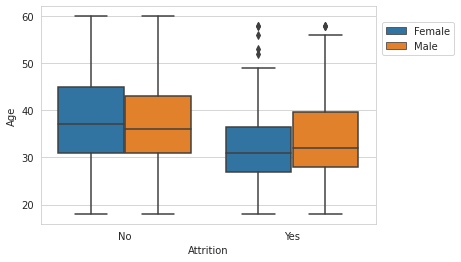

In [15]:
sns.boxplot(x="Attrition", y="Age", data=df, hue="Gender", order=["No","Yes"])
plt.legend(bbox_to_anchor=(1.25, 0.95))

<b> Análise: </b>
    - A médiana da idade das pessoas que saem da empresa é menor do que as que permanecem.
    - Hipótese: pessoas mais novas saem mais da empresa que pessoas mais velhas.

## São casadas?

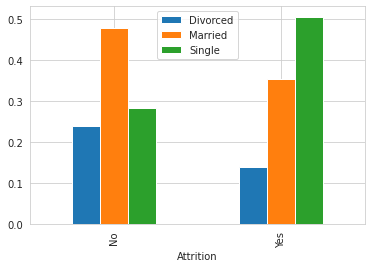

In [16]:
df.groupby("Attrition")["MaritalStatus"].value_counts(normalize=True).unstack().plot(kind="bar")
plt.legend(loc=9)

<b> Análise: </b>
    - A maior parte das pessoas que saem são solteiras, o que fazer sentido, pois são pessoas mais novas.

## Como é o salário dessas pessoas?

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

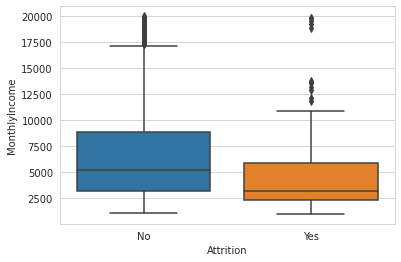

In [17]:
sns.boxplot(df['Attrition'], df['MonthlyIncome'], order=["No","Yes"]) 

### Tem diferença por gênero?

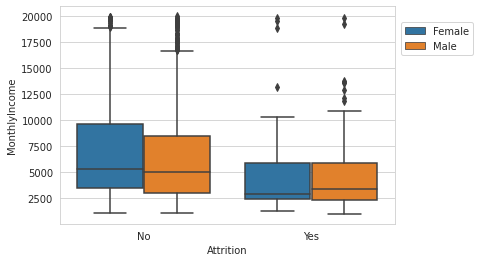

In [18]:
sns.boxplot(df['Attrition'], df['MonthlyIncome'], hue=df["Gender"], order=["No","Yes"]) 
plt.legend(bbox_to_anchor=(1.25, 0.95))

<b> Análise: </b>
    - A mediana do salário de quem sai é menor do que as que não saem.
    - As pessoas saem do trabalho pois estão insatisfeitas com o salário. (Hipótese)
    - A diferença salarial entre homens e mulheres não é significativa, aparentemente.

## E a satisfação com o ambiente de trabalho?
EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

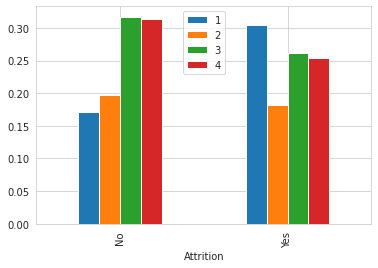

In [19]:
df.groupby("Attrition")["EnvironmentSatisfaction"].value_counts(normalize=True).unstack().plot(kind="bar")
plt.legend(loc=9)

<b> Análise: </b>
    - Pessoas que estão insatisfeitas com o ambiente de trabalho são propensas a sairem do trabalho. (=1)
    - Mais de 60% das pessoas que não saíram estão satisfeitas com ambiente de trabalho.

## E a satisfação com o trabalho?

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

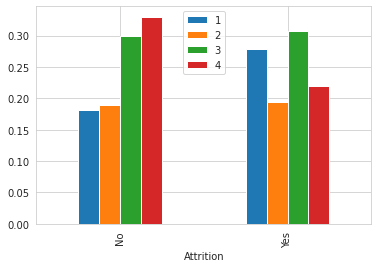

In [20]:
df.groupby("Attrition")["JobSatisfaction"].value_counts(normalize=True).unstack().plot(kind="bar")
plt.legend(loc=9)

<b> Análise </b>
- Pessoas que estão insatifestas com o trabalho saem mais.
- Pessoas que estão totatalmente satifesitas com o trabalho saem menos.

## Elas trabalhavam na empresa há muito tempo?

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

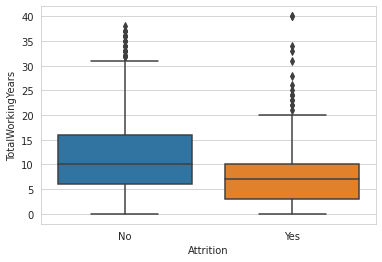

In [21]:
sns.boxplot(df['Attrition'], df['TotalWorkingYears'], order=["No","Yes"]) 

<b> Análise: </b>
    - As pessoas que saem do trabalho, em sua maioria, tem menos tempo de empresa

## Trabalham além da carga horária?

<AxesSubplot:xlabel='Attrition'>

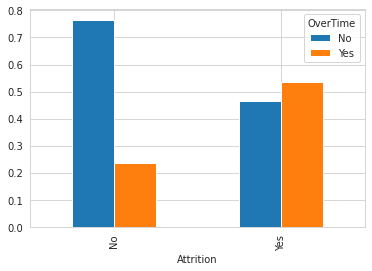

In [22]:
df.groupby("Attrition")["OverTime"].value_counts(normalize=True).unstack().plot(kind="bar")

- <b>Análise: </b> No grupo das pessoas que não sairam, a maior parte não faz hora extra. Diferente do grupo das que saem.

### Das pessoas que trabalham, além da carga horária. Como é o nível de satisfação com o nível de trabalho delas?

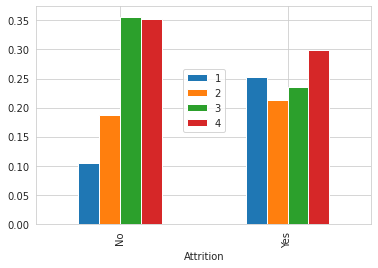

In [23]:
df[df["OverTime"] == "Yes"].groupby("Attrition")["EnvironmentSatisfaction"].value_counts(normalize=True).unstack().plot(kind="bar")
plt.legend(bbox_to_anchor=(0.5,0.4))

<b>Análise: </b> 

- Das pessoas que fazem hora extra, a maioria está satisfeita com o ambiente de trabalho.
- O percentual das pessoas insatisfeitas é maior no grupo que faz hora extra.

## Moravam perto do trabalho?

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

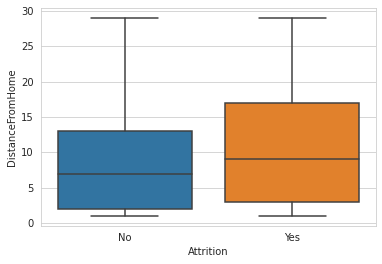

In [24]:
sns.boxplot(x="Attrition", y="DistanceFromHome", data=df, order=["No","Yes"])

<b> Análise: </b>
    - Pessoas que moram mais longe do trabalho, são mais propensas a deixarem do trabalho.

## E qual o nível dessas pessoas?

<AxesSubplot:xlabel='Attrition'>

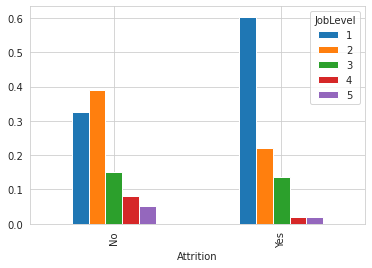

In [25]:
df.groupby("Attrition")["JobLevel"].value_counts(normalize=True).unstack().plot(kind="bar")
#plt.legend(bbox_to_anchor=(0.5,0.4))

<b> Análise: </b>
    - Pessoas mais "junior" são mais propensas a saírem do trabalho.

## E o papel delas?

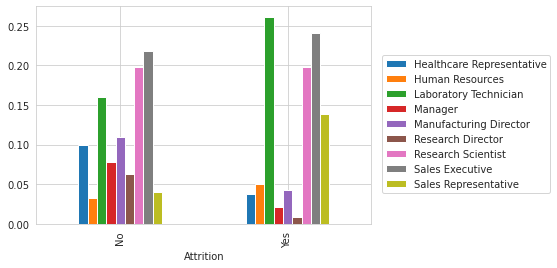

In [26]:
df.groupby("Attrition")["JobRole"].value_counts(normalize=True).unstack().plot(kind="bar")
plt.legend(bbox_to_anchor=(1.55,0.8))

### Quais papéis tem os maiores salários?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

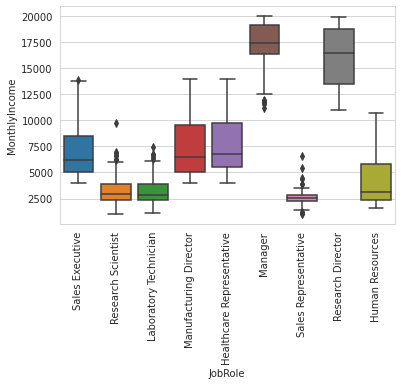

In [27]:
sns.boxplot(df['JobRole'], df['MonthlyIncome']) 
plt.xticks(rotation=90)

<b> Análise: </b>

    - Quem tem os maiores salários praticamente não sairam do trabalho. 
    - Laboratory Tecnician e Research Scientist tem mais saídas e possuiam os salários baixos
    - Papéis relacionadas a vendas, foram os mais propensos a sair. (Representante de Vendas e Executivo de Vendas)

# Seleção de Features e Feature enginering

## Análise da correlação das features

<AxesSubplot:>

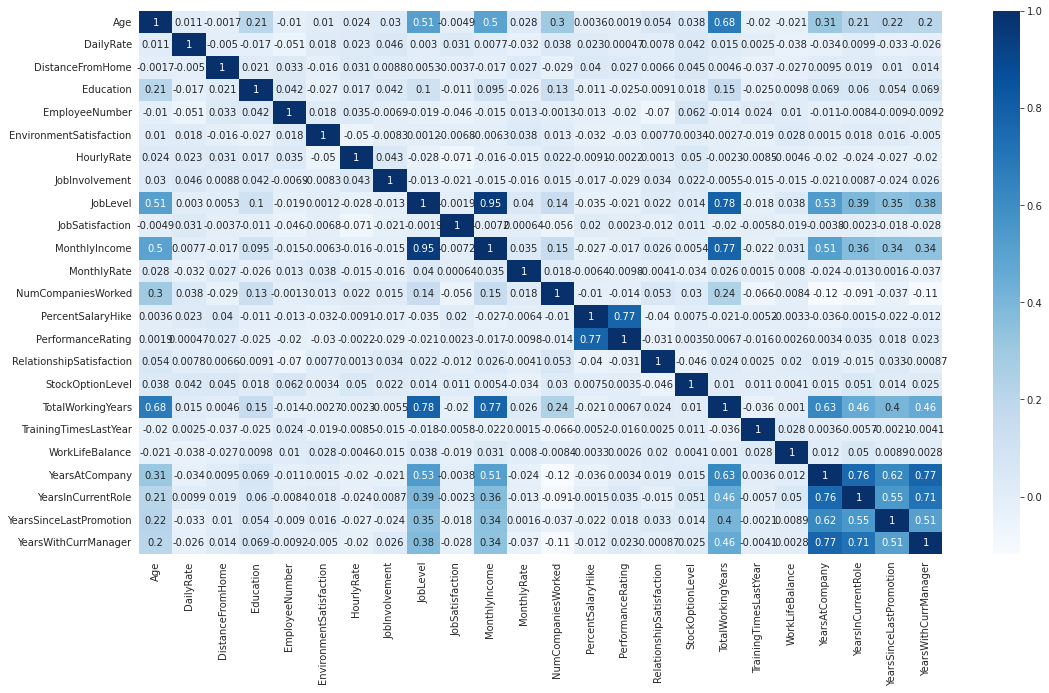

In [28]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

### Reduzir dimensionalidade

In [29]:
df.shape

(1470, 32)

In [30]:
colunas_reduzir = ['YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']

In [31]:
pca = PCA(n_components=1)
pca.fit(df[colunas_reduzir].values)
print("explained: "+ str(pca.explained_variance_ratio_))
df["years_pca"] = pca.transform(df[colunas_reduzir].values)
df.drop(colunas_reduzir, axis=1, inplace=True)

explained: [0.80556036]


In [32]:
df.shape

(1470, 29)

## Criar grupos com uma feature

(array([ 57., 105., 224., 265., 255., 217., 131.,  92.,  77.,  47.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

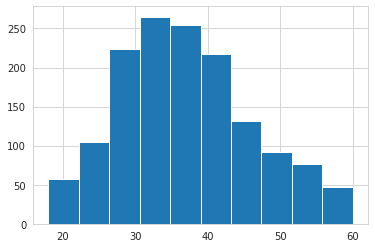

In [33]:
#Agrupar as idades
plt.hist(df["Age"])

In [34]:
# 18-24 = grupo1 , 25-45=grupo2 , >=46 grupo3
df['age_range'] = pd.cut(df['Age'], [17, 24, 45, 120], labels=['18-24', '25-45', '46-60'])
df.drop(['Age'],axis=1,inplace=True)

In [35]:
df[["age_range"]].head()

,age_range
0,25-45
1,46-60
2,25-45
3,25-45
4,25-45


In [36]:
df[["age_range"]].value_counts()

age_range
25-45        1100
46-60         273
18-24          97
dtype: int64

In [37]:
df.shape

(1470, 29)

In [38]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,years_pca,age_range
0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,Yes,11,3,1,0,8,0,1,-1.164875,25-45
1,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,No,23,4,4,1,10,3,3,4.212625,46-60
2,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,Yes,15,3,2,0,7,3,3,-9.381817,25-45
3,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,Yes,11,3,3,0,8,3,3,0.487735,25-45
4,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,No,12,3,4,1,6,3,3,-5.660292,25-45


Poderíamos ter muita mais Feature Engineering...

# Modelo - classificação com pycaret

## Pycaret

Pycaret é uma biblioteca de Machine Learning (ML) que automatiza fluxos de trabalho. 

documentação: https://pycaret.org/classification/

In [40]:
data = df.copy()

In [41]:
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [44]:
from pycaret.classification import *

<b>setup:</b> Esta função inicializa o ambiente de treinamento e cria o pipeline de transformação. Ela deve ser chamada antes de executar qualquer outra função. Possui dois parâmetros obrigatórios: ``data`` e ``target``.

In [42]:
#categorical = list(df.select_dtypes(include=['object']).columns) + list(df.select_dtypes(include=['category']).columns)
#numerics = list(set(df.columns) - set(categorical))
#categorical.remove("Attrition")

In [47]:
setup?

In [45]:
pycaret_config = setup(data = data, 
                              target = 'Attrition', 
                              fix_imbalance=True,
                              fold=5,
                              normalize=True, 
                              session_id=123)

,Description,Value
0,session_id,123
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1470, 29)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


<b> compare_models </b>: Esta função treina e avalia o desempenho de todos os modelos disponíveis na biblioteca de modelos usando validação cruzada (Cross Validation)

Explicação Validação Cruzada
<img src="../img/kfold.png" width=500/>

In [46]:
%%time
#best_model = compare_models(exclude=["xgboost"])
best_model = compare_models(include=["lr","knn","nb","dt","svm","rbfsvm","gpc","mlp","ridge","rf","qda","ada","gbc","lda","et","lightgbm"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8531,0.7805,0.2167,0.8405,0.3347,0.2838,0.3699,0.3900
gbc,Gradient Boosting Classifier,0.8511,0.8033,0.3500,0.6480,0.4489,0.3724,0.3985,0.9660
et,Extra Trees Classifier,0.8511,0.7856,0.2278,0.7842,0.3445,0.2884,0.3620,0.3740
lightgbm,Light Gradient Boosting Machine,0.8385,0.7707,0.2667,0.5968,0.3643,0.2874,0.3200,0.3400
ada,Ada Boost Classifier,0.8229,0.7869,0.4833,0.4977,0.4889,0.3821,0.3831,0.3240
mlp,MLP Classifier,0.8171,0.7790,0.4056,0.4817,0.4355,0.3282,0.3325,1.6300
rbfsvm,SVM - Radial Kernel,0.7928,0.7921,0.5667,0.4317,0.4886,0.3621,0.3682,1.2060
svm,SVM - Linear Kernel,0.7674,0.0000,0.5667,0.3927,0.4623,0.3212,0.3306,0.0880
lr,Logistic Regression,0.7665,0.7898,0.6389,0.4018,0.4918,0.3516,0.3680,2.1880
lda,Linear Discriminant Analysis,0.7607,0.7842,0.6778,0.3960,0.4996,0.3569,0.3789,0.0740


CPU times: user 31.6 s, sys: 39.4 s, total: 1min 10s
Wall time: 1min 29s


### Qual métrica utilizar?

Mini-curso sobre métricas:https://www.youtube.com/watch?v=7tGaa_ekXf4&t=216s&ab_channel=A3DataConsultoria

Métricas Qual utilizar?
- VP: modelo diz que a pessoa vai sair e ela sai.
- VN: modelo diz que a pessoa não vai sair e ela não sai.
- FN: modelo diz que a pessoa não vai sair e ela sai. 
- FP: modelo diz que a pessoa vai sair e ela não sai.
- F1 -> harmoniza recall e precision

- Recall ->  quanto mais alto o recall menos FN tenho.
- Precision -> quanto mais alto a precision menos FP tenho.
- Acurácia -> como meu problema é binário e desbalanceado, não será um modelo bom. Pois, na maior parte dos casos ele informa que todo mundo vai sair.

<b> create_model: </b> Esta função treina e avalia o desempenho de um determinado modelo usando validação cruzada. 

In [47]:
model = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7816,0.0000,0.6944,0.4237,0.5263,0.3950,0.4153
1,0.7427,0.0000,0.6667,0.3692,0.4752,0.3230,0.3477
2,0.7913,0.0000,0.7500,0.4426,0.5567,0.4318,0.4575
3,0.7805,0.0000,0.6944,0.4237,0.5263,0.3942,0.4145
4,0.7024,0.0000,0.6111,0.3188,0.4190,0.2447,0.2681
Mean,0.7597,0.0000,0.6833,0.3956,0.5007,0.3577,0.3806
SD,0.0331,0.0000,0.0451,0.0456,0.0485,0.0666,0.0663


In [48]:
print(model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


<b> tune_model:</b> Essa função ajusta os hiperparâmetros de um determinado modelo. 

In [49]:
tune_model?

In [50]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7913,0.0000,0.7222,0.4407,0.5474,0.4219,0.4436
1,0.7524,0.0000,0.6667,0.3810,0.4848,0.3375,0.3604
2,0.8010,0.0000,0.7778,0.4590,0.5773,0.4582,0.4855
3,0.7805,0.0000,0.6667,0.4211,0.5161,0.3834,0.4003
4,0.7171,0.0000,0.6111,0.3333,0.4314,0.2641,0.2856
Mean,0.7684,0.0000,0.6889,0.4070,0.5114,0.3730,0.3951
SD,0.0304,0.0000,0.0567,0.0450,0.0505,0.0676,0.0689


### Avaliar o modelo

<b>plot_model:</b> Esta função analisa o desempenho de um modelo treinado no conjunto de validação}

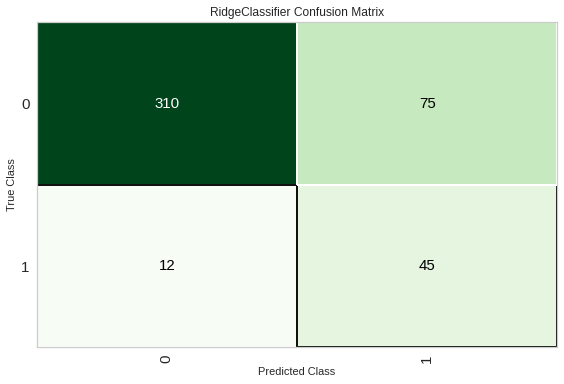

In [51]:
plot_model(tuned_model, plot = 'confusion_matrix')

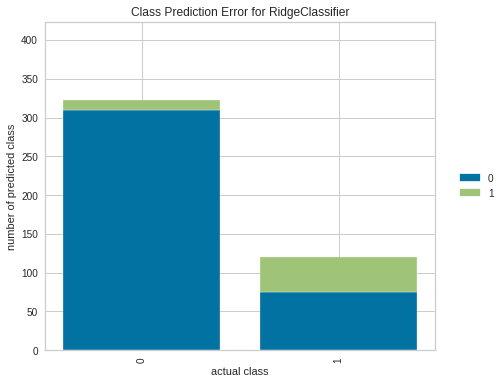

In [52]:
plot_model(tuned_model, plot = 'error')

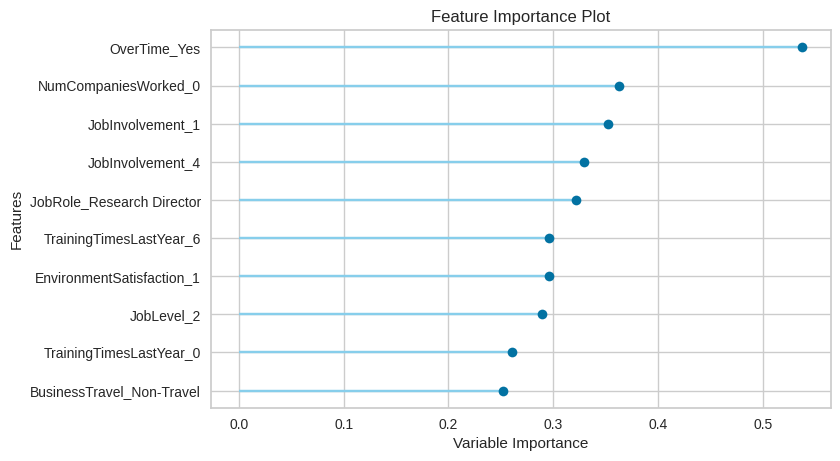

In [53]:
plot_model(tuned_model, plot = 'feature')

In [54]:
plot_model(tuned_model, plot = 'parameter')

,Parameters
alpha,8.96
class_weight,None
copy_X,True
fit_intercept,False
max_iter,None
normalize,True
random_state,123
solver,auto
tol,0.001


<b>evaluate_model</b>: Esta função exibe uma interface de usuário para analisar o desempenho de um treinado

In [55]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Salvar modelo

<b> save_model: </b> Esta função salva o pipeline de transformação e o objeto de modelo treinado no diretório de trabalho atual como um arquivo pickle para uso posterior.

In [ ]:
save_model(tuned_model,'../output/model')

# Próximos passos CD's


- Meu modelo está bom?
- Faz sentido para a área de negócio?
- Validar com a área de negócio
- Apresentação do modelo para área de negócio (sem "tecniquês")
- Apresentação da análise
- Construção do storytelling
- Colocar o Modelo em produção

# Dicas:

Outras bibliotecas que facilitam o processo de treinamento:

- AutoGluon: https://github.com/awslabs/autogluon
- Mljar: https://github.com/mljar
- TPOT: https://github.com/EpistasisLab/tpot

Um artigo: https://medium.com/a3data/encontrando-solu%C3%A7%C3%B5es-de-machine-leaning-mais-rapidamente-51ca00cbd0f4

Para facilitar a organização e deploy:

- Hermione: https://github.com/A3Data/hermione
